In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
np.random.seed(seed=42)

In [2]:
taxi = pd.read_csv('../Desktop/capstone3/nyc-taxi-trip-duration/taxi.csv')

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
#this turns duration from second to minutes
taxi['trip_duration_mins']= taxi['trip_duration']/60


In [5]:
taxi['trip_duration_mins'].min()

0.016666666666666666

In [6]:
taxi['trip_duration_mins'].max()

58771.36666666667

In [7]:
taxi['trip_duration_mins'].mean()

15.99153788267276

In [8]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])


In [9]:
#monday = 0 sunday = 6 for pickup day of week
#making columns for day of week, month, and hour
taxi['pickup_dayofweek']= taxi['pickup_datetime'].dt.weekday
taxi['pickup_month'] = taxi['pickup_datetime'].dt.month
taxi['pickup_hour'] = taxi['pickup_datetime'].dt.hour

In [10]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  trip_duration_mins  1458644 non-null  float64       
 12  pickup_dayofweek    1458644 non-null  int64         
 13  pickup_month

In [11]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])


In [12]:
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])


In [13]:
def wkday_or_wkend(row):
    if row['pickup_dayofweek'] == 5:
      return "weekend"
    elif row['pickup_dayofweek'] == 6:
      return "weekend"
    else:
      return "weekday"

taxi['pickup_wkend_or_wkday'] = taxi.apply (lambda row: wkday_or_wkend(row), axis=1)

In [14]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1458644 non-null  object        
 1   vendor_id              1458644 non-null  int64         
 2   pickup_datetime        1458644 non-null  datetime64[ns]
 3   dropoff_datetime       1458644 non-null  datetime64[ns]
 4   passenger_count        1458644 non-null  int64         
 5   pickup_longitude       1458644 non-null  float64       
 6   pickup_latitude        1458644 non-null  float64       
 7   dropoff_longitude      1458644 non-null  float64       
 8   dropoff_latitude       1458644 non-null  float64       
 9   store_and_fwd_flag     1458644 non-null  object        
 10  trip_duration          1458644 non-null  int64         
 11  trip_duration_mins     1458644 non-null  float64       
 12  pickup_dayofweek       14586

In [15]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mins,pickup_dayofweek,pickup_month,pickup_hour,pickup_wkend_or_wkday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333,0,3,17,weekday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000,6,6,0,weekend
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000,1,1,11,weekday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000,2,4,19,weekday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000,5,3,13,weekend


In [16]:
#trimming down the data set to look at under 3 hour trips
taxi_under180mins=taxi.loc[taxi[('trip_duration_mins')]<180]
taxi_under120mins=taxi.loc[taxi[('trip_duration_mins')]<120]
taxi_under60mins=taxi.loc[taxi[('trip_duration_mins')]<60]


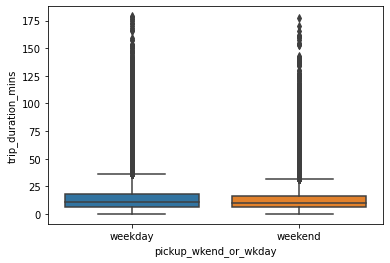

In [17]:
#under 3 hours 
#what do i do here... remove outliers or leave it?
ax = sns.boxplot(x = 'pickup_wkend_or_wkday', y = 'trip_duration_mins', data = taxi_under180mins)
ax


In [18]:
#ttest for 3 hours
stats.ttest_ind(mpg[american]['MPG'], mpg[japanese]['MPG'], equal_var=False )

NameError: name 'mpg' is not defined

In [ ]:
weekday= taxi_under180mins['pickup_wkend_or_wkday'] == 'weekday' 
weekend= taxi_under180mins['pickup_wkend_or_wkday'] == 'weekend'

In [ ]:
stats.ttest_ind(taxi_under180mins[weekday]['trip_duration_mins'],taxi_under180mins[weekend]['trip_duration_mins'], equal_var=False)

In [ ]:
#under 2 hours 
ax = sns.boxplot(x = 'pickup_wkend_or_wkday', y = 'trip_duration_mins', data = taxi_under120mins)
ax

In [ ]:
stats.ttest_ind(taxi_under120mins[weekday]['trip_duration_mins'],taxi_under120mins[weekend]['trip_duration_mins'], equal_var=False)

In [ ]:
#under 1 hour 
ax = sns.boxplot(x = 'pickup_wkend_or_wkday', y = 'trip_duration_mins', data = taxi_under60mins)
ax

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekday']['trip_duration_mins'].median()

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekend']['trip_duration_mins'].median()

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekday']['trip_duration_mins'].quantile(0.75)
#75 % of trips are 18 mins or less

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekend']['trip_duration_mins'].quantile(0.75)
#75 % of trips are 16 mins or less

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekday']['trip_duration_mins'].mean()

In [ ]:
taxi_under60mins.loc[taxi_under60mins['pickup_wkend_or_wkday']== 'weekend']['trip_duration_mins'].mean()

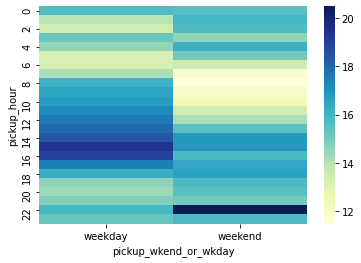

In [19]:
hourvsday = pd.pivot_table(data=taxi,index='pickup_hour', values='trip_duration_mins', columns='pickup_wkend_or_wkday')
sns.heatmap(hourvsday, cmap="YlGnBu")

In [ ]:
#trips are generally longer on weekdays than they are on weekends
#try on a bar plot
#could run a t test to see if the difference between weekday/weekend trips are significant 
#look at tuesday-thursdayhourvsday = pd.pivot_table(data=taxi,index='pickup_hour', values='trip_duration_mins', columns='pickup_dayofweek')
sns.heatmap(hourvsday, cmap="YlGnBu")



In [ ]:
taxi['passenger_count'].value_counts()

In [ ]:
taxi['passenger_count'].value_counts().sum()

In [ ]:
x = taxi.loc[taxi['pickup_wkend_or_wkday']== 'weekday']['passenger_count'].values
sns.distplot(x, hist=False)

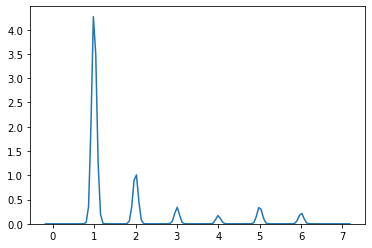

In [22]:
x = taxi.loc[taxi['pickup_wkend_or_wkday']== 'weekend']['passenger_count'].values
sns.distplot(x, hist=False)

In [ ]:
taxi.loc[taxi['pickup_wkend_or_wkday']== 'weekend']['passenger_count'].mean()

In [ ]:
taxi.loc[taxi['pickup_wkend_or_wkday']== 'weekday']['passenger_count'].mean()

In [21]:
sns.lineplot(x='passenger_count',y =, hue = 'pickup_wkend_or_wkday', data=taxi)

SyntaxError: invalid syntax (<ipython-input-21-609c199a36d7>, line 1)